# PPM (exp. 3)

In [1]:
from cmme.idyom import *
from cmme.ppmdecay import *
from cmme.drex import *

In [2]:
#changed after 82
input_sequence = [2000, 1587, 315, 1414, 890, 397, 1781, 630, 222, 561, 1259, 280, 1122, 2000, 500, 315, 1414, 222, 630, 890, 280, 1000, 315, 561, 1000, 707, 250, 2000, 280, 445, 1259, 354, 250, 397, 315, 445, 1414, 707, 397, 1000, 280, 707, 1122, 2000, 1122, 630, 1587, 793, 500, 354, 890, 250, 890, 1122, 280, 315, 1781, 397, 1000, 500, 354, 890, 793, 222, 561, 1259, 1781, 1259, 1587, 222, 445, 793, 397, 630, 315, 1781, 354, 1000, 445, 561, 250, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]

prior_input_sequence = [1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
prior_D = 5
prior = UnprocessedPrior(DistributionType.GAUSSIAN, prior_input_sequence, prior_D)

alphabet_levels = sorted(set(input_sequence))

print("Input sequence:", input_sequence)
print("Length of input sequence:", len(input_sequence))
print()
print("DREX: Prior input sequence:", prior_input_sequence)
print("DREX: Prior D:", prior_D)
print("DREX: Prior distribution:", prior.__dict__)
print()
print("PPM: Alphabet levels:", alphabet_levels)

Input sequence: [2000, 1587, 315, 1414, 890, 397, 1781, 630, 222, 561, 1259, 280, 1122, 2000, 500, 315, 1414, 222, 630, 890, 280, 1000, 315, 561, 1000, 707, 250, 2000, 280, 445, 1259, 354, 250, 397, 315, 445, 1414, 707, 397, 1000, 280, 707, 1122, 2000, 1122, 630, 1587, 793, 500, 354, 890, 250, 890, 1122, 280, 315, 1781, 397, 1000, 500, 354, 890, 793, 222, 561, 1259, 1781, 1259, 1587, 222, 445, 793, 397, 630, 315, 1781, 354, 1000, 445, 561, 250, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
Length of input sequence: 130

DREX: Prior input sequence: [1000, 315, 354, 280, 707, 561, 1587, 1259, 793, 890, 1000, 315, 354, 280, 707, 561, 1587, 1259]
DREX: Prior D: 5
DREX: Prior distribution: {'_D': 5, '_feature_count': 1, '_trials_count': 1, '_distribution': <DistributionType.GAUSSI

# PPM

In [3]:
input_time_sequence = list(range(0, len(input_sequence)))

ppm_ib = PPMDecayInstructionBuilder()
ppm_ib.alphabet_levels(alphabet_levels).input_sequence(input_sequence, input_time_sequence)

ppm_if = ppm_ib.to_instructions_file()

ppm_model = PPMModel()

ppm_rf = ppm_model.run_instructions_file(ppm_if)

Instructions file written to /Users/alexander/cmme-io/20240120T160534-PPMModel.feather


# D-REX

In [4]:
drex_ib = DREXInstructionBuilder()
drex_ib.prior(prior).input_sequence(input_sequence)

drex_if = drex_ib.to_instructions_file()

drex_model = DREXModel()

drex_rf = drex_model.run_instructions_file(drex_if)

Instructions file written to /Users/alexander/cmme-io/20240120T160536-DREXModel.mat


# Plot

In [5]:
from cmme.archive.visualization import DataFrame, MatlabPlot

data_frame = DataFrame(ppm_rf, drex_rf, input_sequence)

In [6]:
mp = MatlabPlot(data_frame)
# or:
#mp = MatplotlibPlot(data_frame)

Instructions file path set to /Users/alexander/cmme-io/20240120T160545-visualization.mat
Plot output file path set to /Users/alexander/cmme-io/20240120T160545-visualization-output.png
Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-b3e519ca-1665-4520-a054-c6b996a9a53c
Send 'exit' command to kill the server
.......MATLAB started and connected!


2024-01-20 17:05:54.409 MATLAB[58057:3831089] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-01-20 17:05:54.409 MATLAB[58057:3831089] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2024-01-20 17:05:54.413 MATLAB[58057:3831089] CoreText note: Client requested name ".SFNS-Bold", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-01-20 17:05:54.419 MATLAB[58057:3831089] CoreText note: Client requested name ".SFNS-Regular", it will get TimesNewRomanPSMT rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-01-20 17:

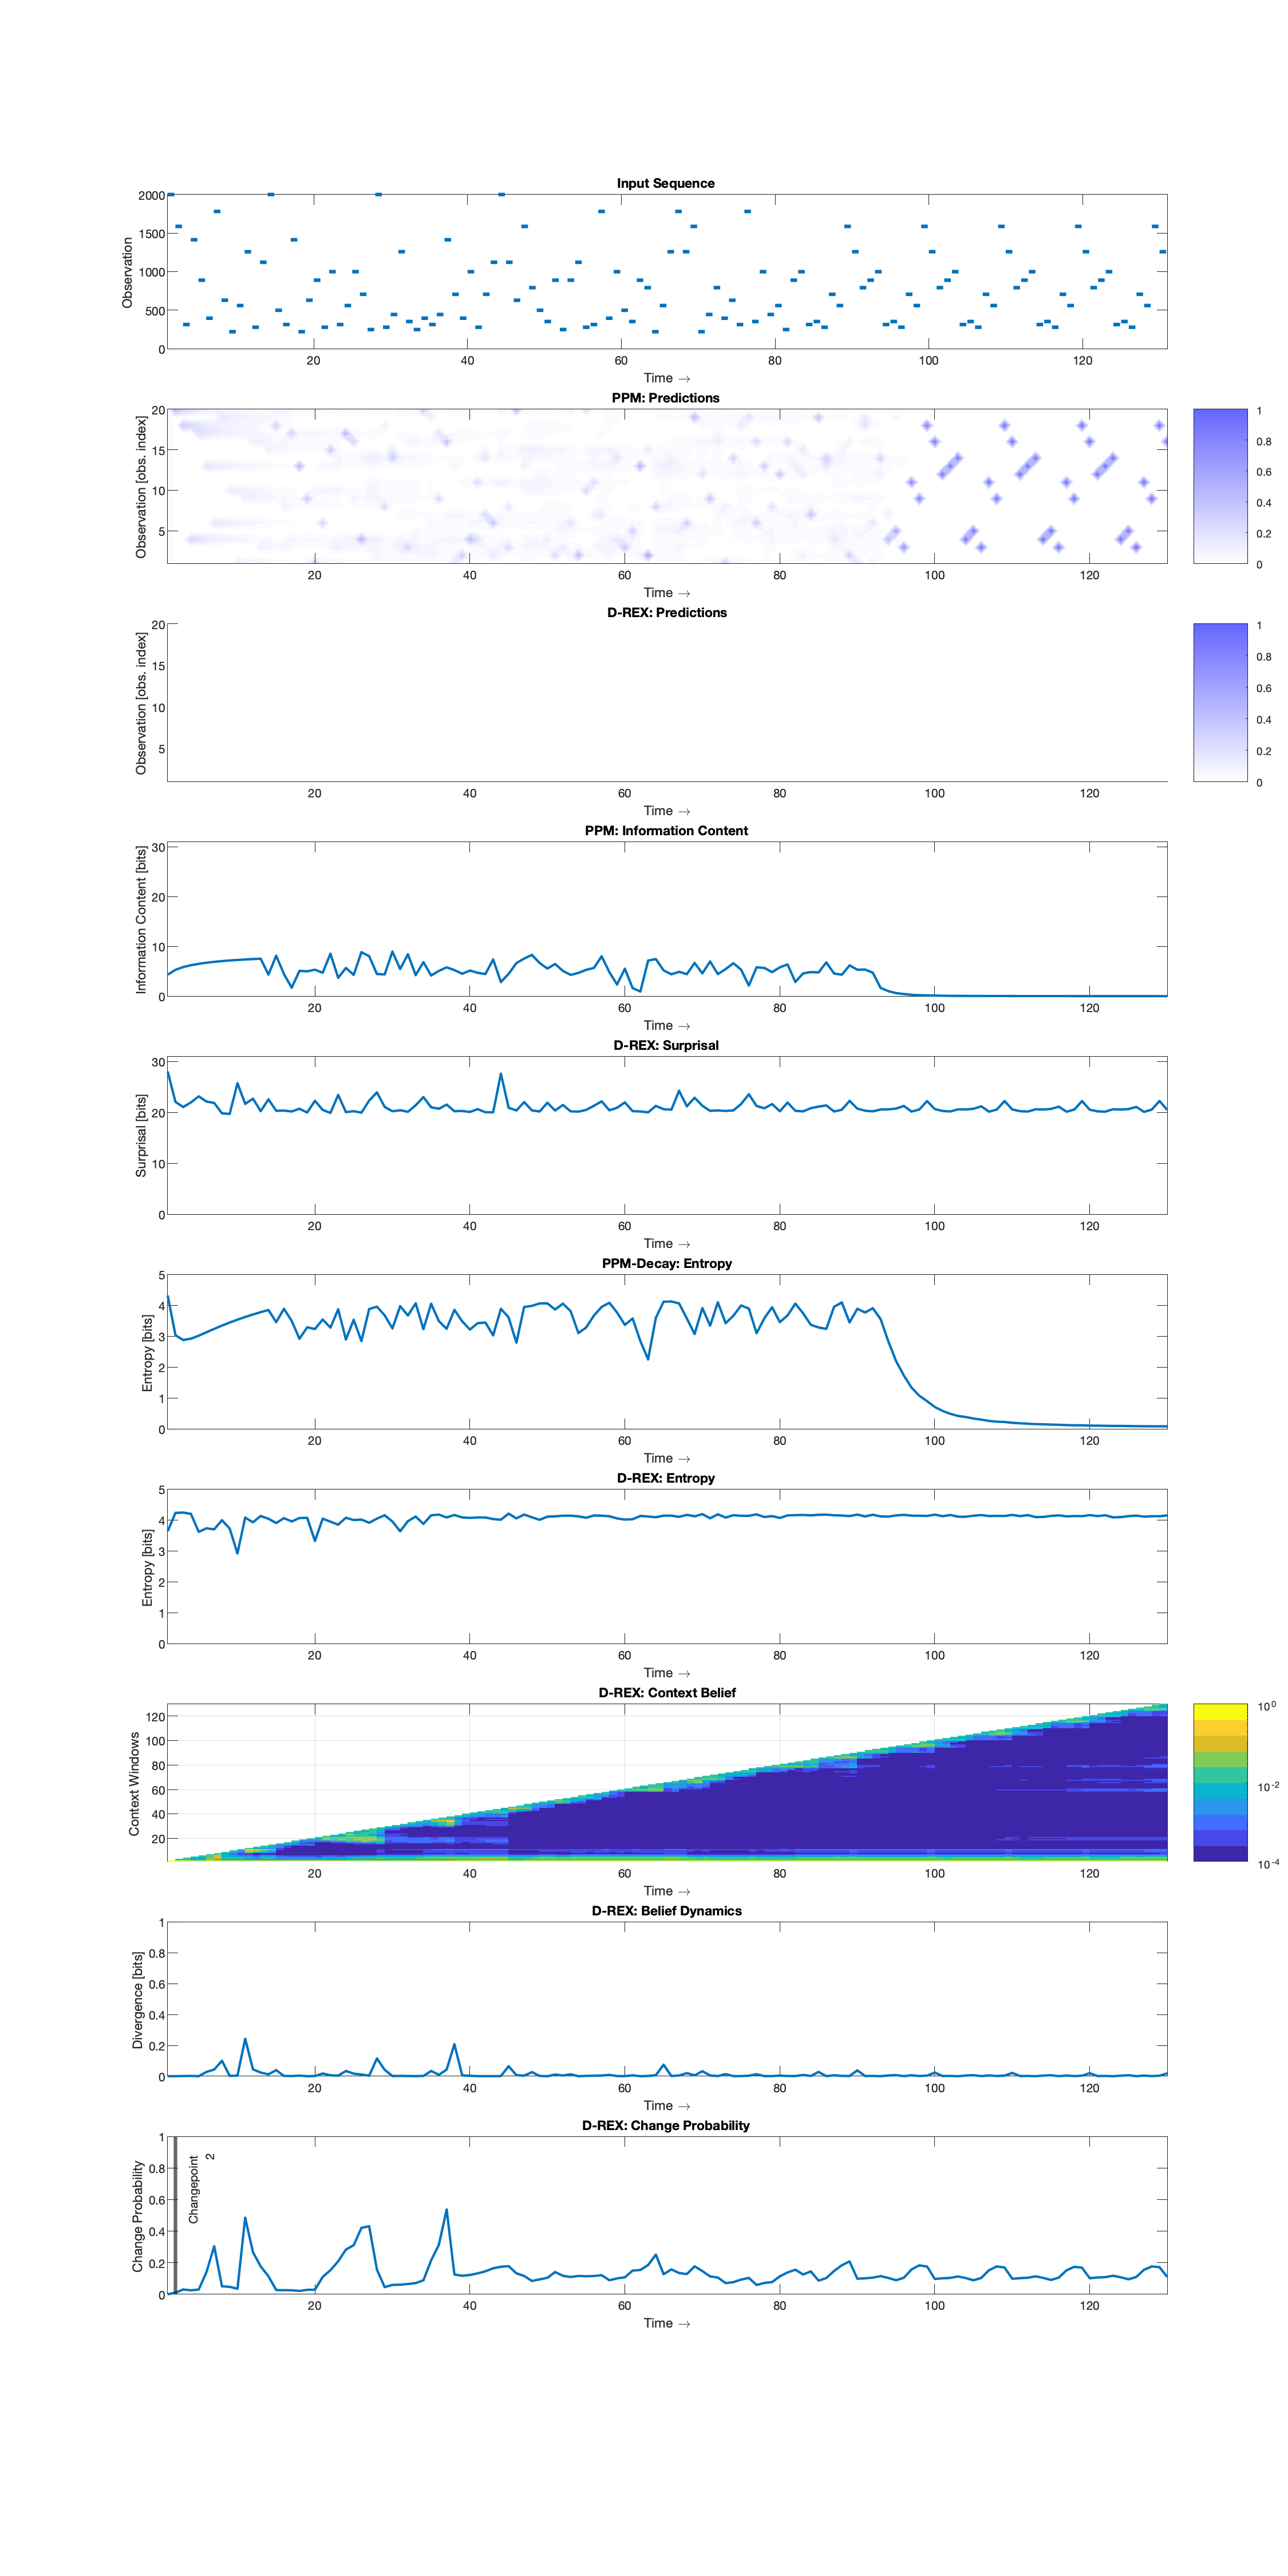

In [7]:
mop_figures = mp.plot()

from IPython.display import Image
for f in mop_figures:
    display(Image(filename=f))